In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
import os 
print os.getcwd()

/home/sc268/Dropbox/codes/2016_code_for_america


/home/sc268/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
## read data
dat = pd.read_csv('Violations-2012.csv')
dat.head()

,violation_id,inspection_id,violation_category,violation_date,violation_date_closed,violation_type
0,204851,261019,Garbage and Refuse,2012-01-03 00:00:00,2012-02-02 00:00:00,Refuse Accumulation
1,204852,261019,Unsanitary Conditions,2012-01-03 00:00:00,2012-02-02 00:00:00,"Unsanitary conditions, not specified"
2,204853,261023,Garbage and Refuse,2012-01-03 00:00:00,2012-01-17 00:00:00,Refuse Accumulation
3,204854,261023,Garbage and Refuse,2012-01-03 00:00:00,2012-01-17 00:00:00,Refuse Accumulation
4,204858,261029,Garbage and Refuse,2012-01-03 00:00:00,2012-03-12 00:00:00,Refuse Accumulation


In [94]:
## short summary
# not meaningful though since this computes avg(ID number), avg(inspection number)
# dat.describe()

In [12]:
## counts group by violation category
dat.groupby(['violation_category']).count()

,violation_id,inspection_id,violation_date,violation_date_closed,violation_type
violation_category,,,,,
Air Pollutants and Odors,2,2,2,1,2
Animals and Pests,180,180,180,138,180
Biohazards,7,7,7,6,7
Building Conditions,62,62,62,43,62
Chemical Hazards,17,17,17,16,17
Garbage and Refuse,126,126,126,102,126
Retail Food,1,1,1,1,1
Unsanitary Conditions,83,83,83,65,83
Vegetation,67,67,67,57,67


In [25]:
## the number of violations in each category
dat[['violation_id', 'violation_category']].groupby(['violation_category']).count()

,violation_id
violation_category,
Air Pollutants and Odors,2
Animals and Pests,180
Biohazards,7
Building Conditions,62
Chemical Hazards,17
Garbage and Refuse,126
Retail Food,1
Unsanitary Conditions,83
Vegetation,67


In [27]:
## the earliest and latest violation date for each category
dat[['violation_date', 'violation_category']].groupby(['violation_category']).agg([min, max])

violation_date                     
                                          min                  max
violation_category                                                
Air Pollutants and Odors  2012-12-05 00:00:00  2012-12-19 00:00:00
Animals and Pests         2012-01-03 00:00:00  2012-12-28 00:00:00
Biohazards                2012-04-13 00:00:00  2012-12-18 00:00:00
Building Conditions       2012-01-12 00:00:00  2012-12-26 00:00:00
Chemical Hazards          2012-02-08 00:00:00  2012-12-06 00:00:00
Garbage and Refuse        2012-01-03 00:00:00  2012-12-21 00:00:00
Retail Food               2012-12-20 00:00:00  2012-12-20 00:00:00
Unsanitary Conditions     2012-01-03 00:00:00  2012-12-19 00:00:00
Vegetation                2012-02-01 00:00:00  2012-12-05 00:00:00

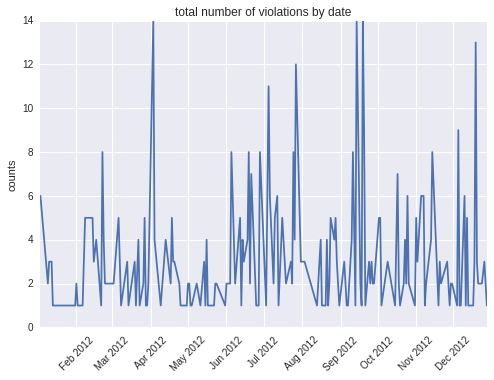

In [89]:
## create an aggregated time series of counts
idx = map(lambda x: pd.Timestamp(x).date(), dat.violation_date.values)
ts = pd.Series([1]*len(idx), index = idx)
ts.groupby(ts.index).sum().plot()

locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('counts')
plt.title('total number of violations by date')
plt.show()